# Testing the OpenCV Watershed Algorithm
[OpenCV Watershed Docs](https://docs.opencv.org/4.x/d3/db4/tutorial_py_watershed.html)

[Article](https://pyimagesearch.com/2015/11/02/watershed-opencv/)

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import os

In [2]:
source_dir = "/Users/johnmays/Documents/Wirth Lab/convection-cell-research/data/test_images/"
os.chdir(source_dir)
img = cv.imread('water_coins.jpg')

In [3]:
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

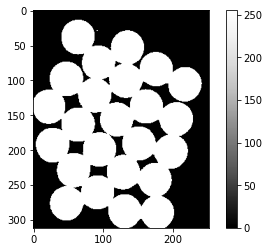

In [5]:
plt.imshow(thresh, cmap='Greys_r', vmin=0, vmax=255)
plt.colorbar();

In [6]:
 # noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

In [7]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [8]:
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]

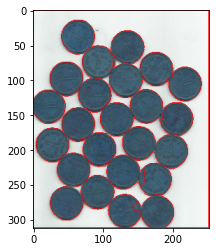

In [10]:
plt.imshow(img);